Importáljuk a pandas, seaborn és a matplotlib modult

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Olvassuk be a company_data csv fájlt

In [105]:
data = pd.read_csv('company_data.csv')
data.head()

,name,salary,birth_date,position,department
0,Heidi,996,1956-7-2,manager,Cleaning
1,Alice,868,1954-7-21,developer,Cleaning
2,Alice,1727,1964-9-24,driver,Finance
3,Ivan,749,1967-3-2,courier,HR
4,Grace,761,1955-5-28,courier,Transport


Állítsuk be minden sornak a helyes típusát
[str, int, date, category, category]

In [106]:
data['name'].astype('str')
data['salary'].astype('int')
data['birth_date']=pd.to_datetime(data['birth_date'])
data['position'].astype('category')
data['department'].astype('category')
data.head()

,name,salary,birth_date,position,department
0,Heidi,996,1956-07-02,manager,Cleaning
1,Alice,868,1954-07-21,developer,Cleaning
2,Alice,1727,1964-09-24,driver,Finance
3,Ivan,749,1967-03-02,courier,HR
4,Grace,761,1955-05-28,courier,Transport


Jelenítsük meg az adatnak a leírását

In [107]:
data.describe()

,salary,birth_date
count,10000.000000,10000
mean,1031.415200,1975-07-19 03:11:31.200000
min,302.000000,1950-01-01 00:00:00
25%,737.000000,1962-09-27 18:00:00
50%,953.000000,1975-05-21 12:00:00
75%,1241.000000,1988-05-20 00:00:00
max,2496.000000,2000-12-28 00:00:00
std,406.564885,NaN


Adjunk hozzá egy új oszlopot a data-hoz amiben minden dolgozónak az életkora szerepel

In [108]:
data['age'] = 2024 - data['birth_date'].dt.year
data.head()

,name,salary,birth_date,position,department,age
0,Heidi,996,1956-07-02,manager,Cleaning,68
1,Alice,868,1954-07-21,developer,Cleaning,70
2,Alice,1727,1964-09-24,driver,Finance,60
3,Ivan,749,1967-03-02,courier,HR,57
4,Grace,761,1955-05-28,courier,Transport,69


Minden dolgozónak aki fejlesztőként dolgozik (developer) növeljük a fizetését 10%-al

In [109]:
data.loc[data['position'] == 'developer', 'salary'] *= 1.10
data.head()

C:\Users\Benedek\AppData\Local\Temp\ipykernel_14648\908820755.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 954.8 1458.6 1848.  1049.4  985.6 1014.2 1037.3 1783.1 1086.8  804.1
 1389.3 2433.2 1056.  1113.2 1217.7  749.1 1449.8 1212.2 1197.9 1731.4
 1521.3 1065.9  933.9 1669.8 1262.8  883.3 1004.3 1624.7 1334.3 1294.7
 1189.1 1268.3 1850.2 1146.2 1262.8 1483.9  952.6  755.7 1293.6 1604.9
  985.6 1475.1 1129.7 2267.1 1496.  1753.4 1236.4 2293.5 1095.6 1430.
  995.5  797.5 1725.9 1065.9 1361.8 1646.7 2163.7  883.3 2149.4 1070.3
  951.5 1460.8 1295.8 1643.4 1189.1 1184.7 1244.1 1372.8  881.1 1531.2
 1115.4  691.9 1606.  1868.9 1115.4 2504.7 1302.4  918.5  924.  2126.3
 1408.  1124.2  819.5 1734.7 1377.2 1538.9 1412.4 2226.4 2282.5  888.8
 1384.9 1085.7  983.4  995.5  941.6 1400.3 2481.6 1212.2 1508.1 1922.8
 2505.8  680.9 1621.4 1947.  1613.7 1422.3 1229.8 1005.4 1884.3 2454.1
 1487.2 1595.  2456.3 1

,name,salary,birth_date,position,department,age
0,Heidi,996.0,1956-07-02,manager,Cleaning,68
1,Alice,954.8,1954-07-21,developer,Cleaning,70
2,Alice,1727.0,1964-09-24,driver,Finance,60
3,Ivan,749.0,1967-03-02,courier,HR,57
4,Grace,761.0,1955-05-28,courier,Transport,69


Adjunk hozzá a data-hoz egy sort ami mindenkihez hozzárendeli a department átlagfizetését

In [110]:
data['avg_department_salary'] = data.groupby('department')['salary'].transform('mean')
data.head()

,name,salary,birth_date,position,department,age,avg_department_salary
0,Heidi,996.0,1956-07-02,manager,Cleaning,68,591.134072
1,Alice,954.8,1954-07-21,developer,Cleaning,70,591.134072
2,Alice,1727.0,1964-09-24,driver,Finance,60,1902.555567
3,Ivan,749.0,1967-03-02,courier,HR,57,897.082323
4,Grace,761.0,1955-05-28,courier,Transport,69,892.455894


Készítsük el az adathalmaz korrelációs mátrixát

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns



In [112]:
correlation_matrix = data[['age', 'salary', 'department', 'position']].apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x).corr()
print(correlation_matrix)

                 age    salary  department  position
age         1.000000  0.002269    0.011253 -0.000657
salary      0.002269  1.000000   -0.142215 -0.270015
department  0.011253 -0.142215    1.000000  0.017787
position   -0.000657 -0.270015    0.017787  1.000000


Vizualizáljuk ezt a korrelációt

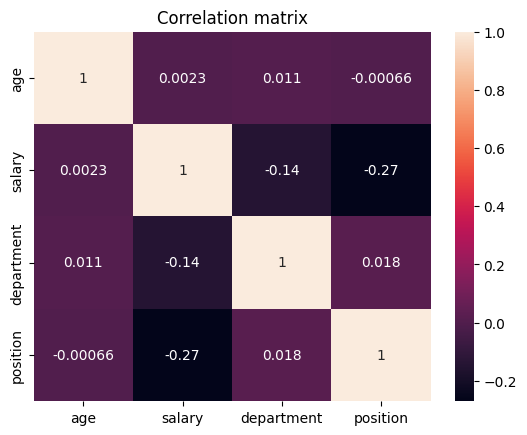

In [113]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix')
plt.show()

Számolkuk ki azt a Lineáris Regressziót, ami megbecsüli egy új alkalmazottnak a fizetését a kora alapján

In [114]:
from sklearn.linear_model import LinearRegression

Deparment és position kategorizálása

In [115]:
data['position_cat'] = pd.factorize(data['position'])[0]
data['department_cat'] = pd.factorize(data['department'])[0]
data[data['position']=='developer'].head()

,name,salary,birth_date,position,department,age,avg_department_salary,position_cat,department_cat
1,Alice,954.8,1954-07-21,developer,Cleaning,70,591.134072,1,0
5,Judy,1458.6,1980-12-11,developer,Marketing,44,1088.457732,1,4
14,Heidi,1848.0,1969-12-07,developer,IT,55,1386.227817,1,8
27,David,1049.4,1962-04-06,developer,Catering,62,683.134510,1,9
32,Heidi,985.6,1972-10-04,developer,Production,52,787.493197,1,7


In [116]:
x = data[['age', 'position_cat', 'department_cat']]
y = data['salary']

model = LinearRegression()
model.fit(x, y)
print(model.coef_, model.intercept_)

[  0.10248839 -35.28707979 -19.98426365] 1304.0647726066904


In [117]:
print(model.predict([[30,3,7]]))

[1061.38833922]


C:\Users\Benedek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Vizualizáljuk a lineáris regressziót

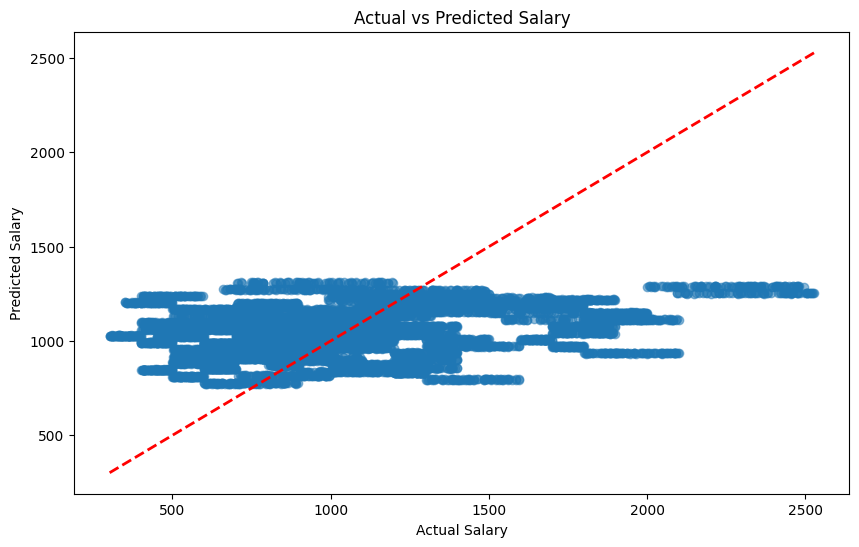

In [118]:
# Predict the salaries using the model
predicted_salaries = model.predict(x)

# Plot the actual vs predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_salaries, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()